In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df=pd.read_csv('Google-Playstore.csv')

In [48]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [50]:
df = df.drop(['App Id','Developer Id','Developer Website','Developer Email','Minimum Installs','Privacy Policy','Scraped Time',
], axis=1, inplace=False)

In [51]:
df.head()

,App Name,Category,Rating,Rating Count,Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,Adventure,0.0,0.0,10+,15,True,0.0,USD,10M,7.1 and up,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",7662,True,0.0,USD,2.9M,5.0 and up,"May 21, 2020","May 06, 2021",Everyone,True,False,False
2,Vibook,Productivity,0.0,0.0,50+,58,True,0.0,USD,3.7M,4.0.3 and up,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,19,True,0.0,USD,1.8M,4.0.3 and up,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False
4,GROW.me,Tools,0.0,0.0,100+,478,True,0.0,USD,6.2M,4.1 and up,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False


In [52]:
df.isnull().sum()

App Name                2
Category                0
Rating              22883
Rating Count        22883
Installs              107
Maximum Installs        0
Free                    0
Price                   0
Currency              135
Size                  196
Minimum Android      6530
Released            71053
Last Updated            0
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
dtype: int64

In [53]:
df.shape

(2312944, 17)

### 1. What is the distribution of Rating of apps?

<Figure size 1000x600 with 0 Axes>

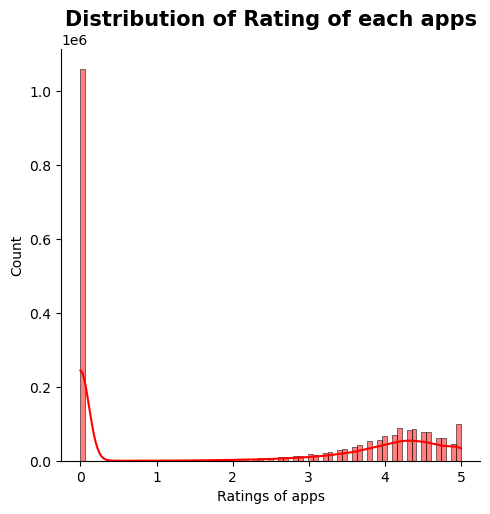

In [54]:
plt.figure(figsize=(10,6), facecolor='#dbd7d7')
sns.displot(x=df['Rating'], kde=True, color='red')
plt.title("Distribution of Rating of each apps", fontsize=15, fontweight='bold')
plt.xlabel("Ratings of apps")
plt.show()

### 2. What are the number of apps are there in each category??

In [55]:
cat=df.groupby('Category').count().reset_index()
cat=cat[['Category','App Name']].sort_values('App Name',ascending=False)

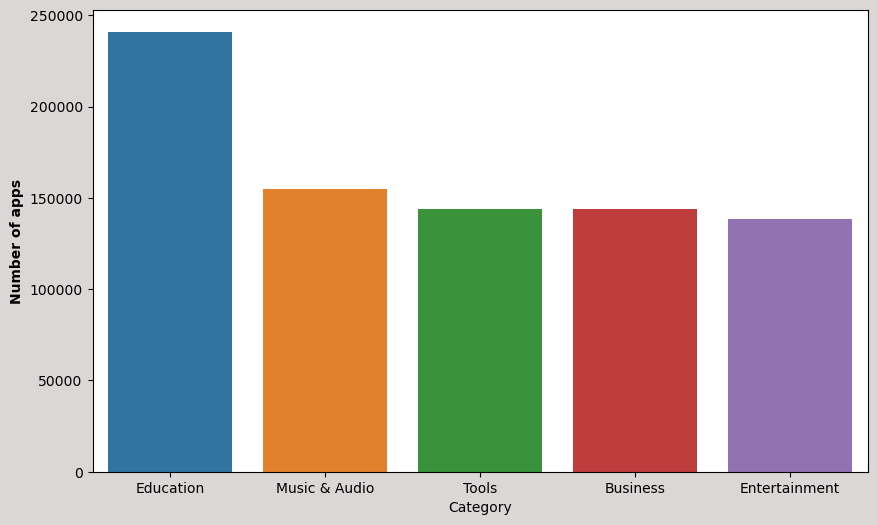

In [56]:
#plotting top 5 category
plt.figure(figsize=(10,6), facecolor='#dbd7d7')
sns.barplot(x='Category',y='App Name',data=cat.head())
plt.ylabel("Number of apps", fontweight='bold')
plt.show()

### 3. What percentage of apps are free??

In [57]:
fr=df.groupby('Free').count().reset_index()
fr=fr[['Free','App Name']].sort_values('App Name',ascending=False)
fr

,Free,App Name
1,True,2267874
0,False,45068


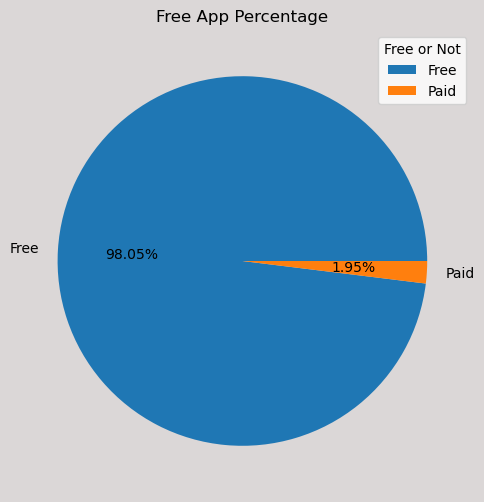

In [58]:
#pie chart
plt.figure(figsize=(10,6), facecolor='#dbd7d7')
plt.pie(fr['App Name'],labels=['Free','Paid'],autopct='%1.2f%%')
plt.legend(title='Free or Not')
plt.title('Free App Percentage')
plt.show()

### 4. Number of apps in Racing categories

In [64]:
df[df['Category']=='Racing'].count()['App Name']

10362

### 5. Time between released and last updation of the apps?

In [71]:
df['Released']=pd.to_datetime(df['Released'])
df['Last Updated']=pd.to_datetime(df['Last Updated'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 17 columns):
 #   Column            Dtype         
---  ------            -----         
 0   App Name          object        
 1   Category          object        
 2   Rating            float64       
 3   Rating Count      float64       
 4   Installs          object        
 5   Maximum Installs  int64         
 6   Free              bool          
 7   Price             float64       
 8   Currency          object        
 9   Size              object        
 10  Minimum Android   object        
 11  Released          datetime64[ns]
 12  Last Updated      datetime64[ns]
 13  Content Rating    object        
 14  Ad Supported      bool          
 15  In App Purchases  bool          
 16  Editors Choice    bool          
dtypes: bool(4), datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 238.2+ MB


In [74]:
df['diff']=(df['Last Updated']-df['Released'])
df.head()

,App Name,Category,Rating,Rating Count,Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,diff
0,Gakondo,Adventure,0.0,0.0,10+,15,True,0.0,USD,10M,7.1 and up,2020-02-26,2020-02-26,Everyone,False,False,False,0 days
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",7662,True,0.0,USD,2.9M,5.0 and up,2020-05-21,2021-05-06,Everyone,True,False,False,350 days
2,Vibook,Productivity,0.0,0.0,50+,58,True,0.0,USD,3.7M,4.0.3 and up,2019-08-09,2019-08-19,Everyone,False,False,False,10 days
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,19,True,0.0,USD,1.8M,4.0.3 and up,2018-09-10,2018-10-13,Everyone,True,False,False,33 days
4,GROW.me,Tools,0.0,0.0,100+,478,True,0.0,USD,6.2M,4.1 and up,2020-02-21,2018-11-12,Everyone,False,False,False,-466 days


### 6. Number of app installations and their categories?

In [75]:
df['Installs'].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', nan,
       '50,000,000+', '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

In [79]:
df2=df.groupby('Installs').count()
df2

,App Name,Category,Rating,Rating Count,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,diff
Installs,,,,,,,,,,,,,,,,,
0+,11566,11566,11313,11313,11566,11566,11566,11566,11564,11503,11035,11566,11566,11566,11566,11566,11035
1+,65345,65345,63475,63475,65345,65345,65345,65345,65325,64815,62367,65345,65345,65345,65345,65345,62367
"1,000+",398199,398199,396125,396125,398199,398199,398199,398197,398186,397262,387696,398199,398199,398199,398199,398199,387696
"1,000,000+",33650,33650,33558,33558,33650,33650,33650,33650,33650,33597,32516,33650,33650,33650,33650,33650,32516
"1,000,000,000+",55,55,55,55,55,55,55,55,55,54,54,55,55,55,55,55,54
10+,300156,300156,294201,294201,300156,300156,300156,300149,300108,298833,288951,300156,300156,300156,300156,300156,288951
"10,000+",256723,256723,255652,255652,256723,256723,256723,256721,256713,256306,249776,256723,256723,256723,256723,256723,249776
"10,000,000+",6192,6192,6190,6190,6192,6192,6192,6191,6192,6171,5993,6192,6192,6192,6192,6192,5993
"10,000,000,000+",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


### 7. How many apps per rating given to apps?

In [82]:
tmp=df.groupby('Rating')['App Name'].count().sort_values(ascending=False)
tmp.head(10)

Rating
0.0    1059762
5.0     100122
4.2      87993
4.4      86304
4.3      83275
4.6      78302
4.5      76753
4.1      69723
4.0      67342
4.7      62205
Name: App Name, dtype: int64

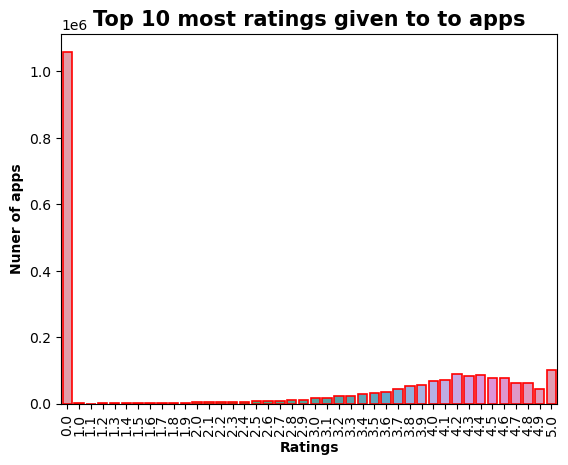

In [92]:
sns.barplot(x=tmp.index,y=tmp.values,edgecolor= 'r', saturation=0.6, linewidth=1.2)
plt.title("Top 10 most ratings given to to apps", fontsize=15, fontweight='bold')
plt.xticks(rotation='vertical')
plt.xlabel("Ratings", fontweight='bold')
plt.ylabel("Nuner of apps", fontweight='bold')
plt.show()

### 8. Median rating and rating count of each app given per category

In [96]:
df.groupby('Category')[['Rating','Rating Count']].median().sort_values(by='Rating Count',ascending=False).head(10)

,Rating,Rating Count
Category,,
Role Playing,3.9,176.0
Simulation,3.8,109.0
Casino,4.1,55.0
Weather,4.0,46.0
Card,3.9,44.5
Video Players & Editors,3.6,33.0
Racing,3.8,30.0
Strategy,3.8,29.0
Comics,3.7,26.0


In [97]:
df2.groupby('Category')['Rating Count'].sum().sort_values(ascending=False).head(10).reset_index()

,Category,Rating Count
0,443368,439265
1,398199,396125
2,300156,294201
3,256723,255652
4,189077,187490
5,170465,168235
6,143593,142939
7,110257,109839
8,75359,75061
9,73772,71698


### 9. Top 5 size of apps

In [102]:
df2=df['Size'].value_counts().head()
df2

Varies with device    74777
11M                   62157
12M                   56080
13M                   48034
14M                   45211
Name: Size, dtype: int64

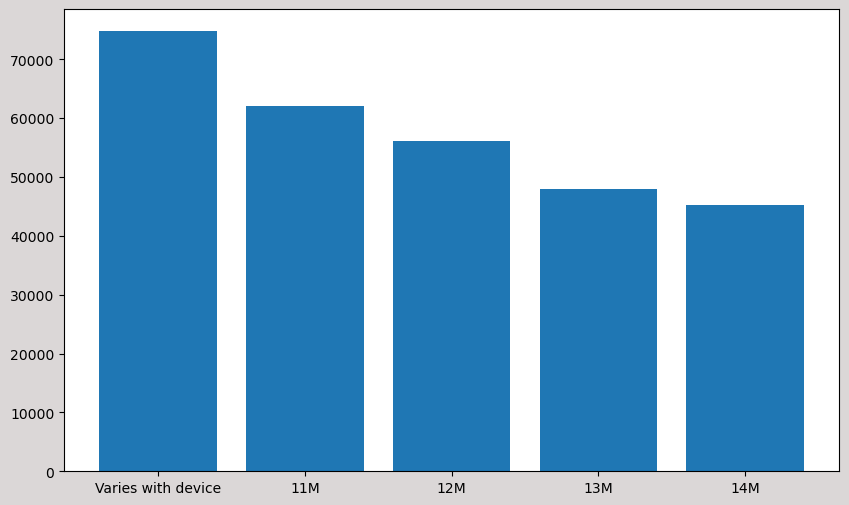

In [104]:
plt.figure(figsize=(10,6), facecolor='#dbd7d7')
plt.bar(df2.index,df2.values)
plt.show()

### 10. What are the number of apps in content rating?

In [114]:
rdf=df.groupby('Content Rating').count().reset_index()[['Content Rating','App Name']]
rdf['perc']=rdf['App Name'].map(lambda x:round((x/rdf['App Name'].sum())*100,2))
rdf.sort_values(by='App Name',ascending=False)

,Content Rating,App Name,perc
1,Everyone,2022087,87.42
4,Teen,196375,8.49
3,Mature 17+,60289,2.61
2,Everyone 10+,33901,1.47
5,Unrated,154,0.01
0,Adults only 18+,136,0.01


### 11. What about Ad supported or not and in app purchase status?

In [116]:
df['Ad Supported'].value_counts()

False    1162170
True     1150774
Name: Ad Supported, dtype: int64

In [118]:
df['In App Purchases'].value_counts()

False    2117635
True      195309
Name: In App Purchases, dtype: int64

### 12. What's distribution of price of apps and its relation with ad supported?

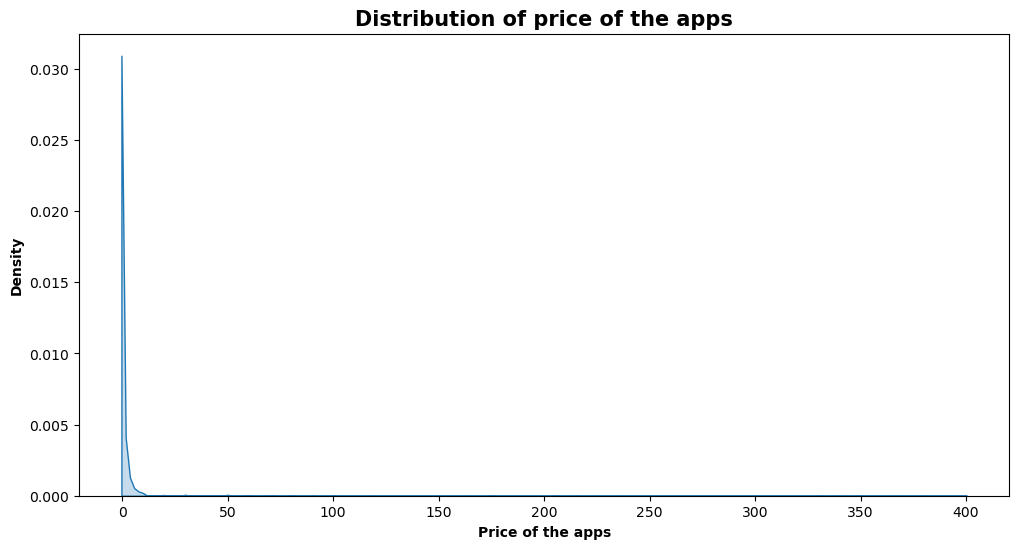

In [125]:
plt.figure(figsize=(12,6))
sns.kdeplot(df['Price'], fill=True)
plt.title("Distribution of price of the apps", fontsize=15, fontweight='bold')
plt.xlabel("Price of the apps",  fontweight='bold')
plt.ylabel('Density', fontweight='bold')
plt.show()